In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Bank Previous Data/bank-previousData.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Customer     0
dtype: int64

In [ ]:
df = data.copy()

Text(0.5, 1.0, 'Education type vs Count')

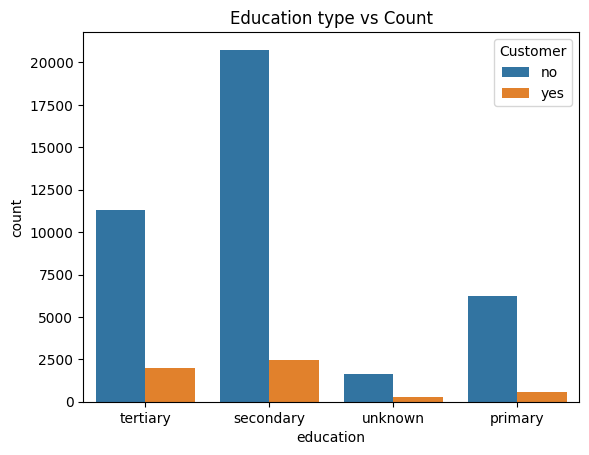

In [ ]:
sns.countplot(x="education",data=df, hue = "Customer")
plt.title("Education type vs Count")

In [ ]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

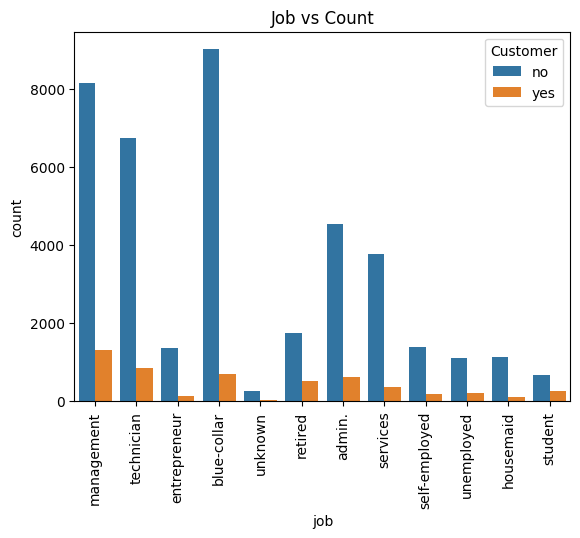

In [ ]:
sns.countplot(x="job", data = df, hue ="Customer")
plt.title("Job vs Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Martial Status vs Count')

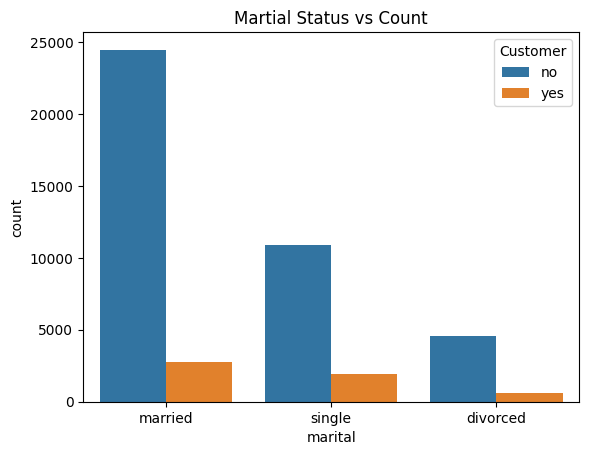

In [ ]:
sns.countplot(x="marital", data = df,hue ="Customer")
plt.title("Martial Status vs Count")

Text(0.5, 1.0, 'personal loan vs Count')

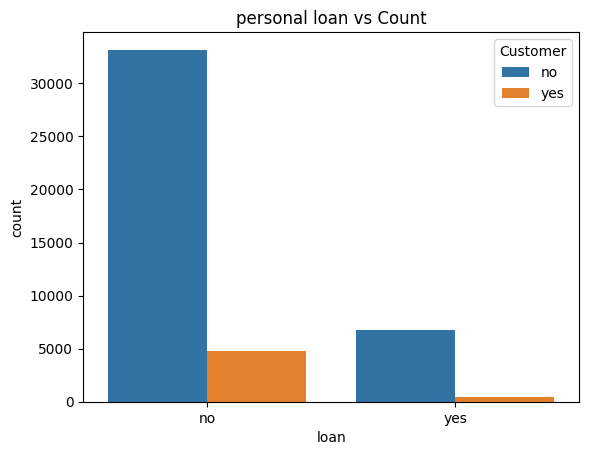

In [ ]:
sns.countplot(x="loan", data = df, hue ="Customer")
plt.title("personal loan vs Count")

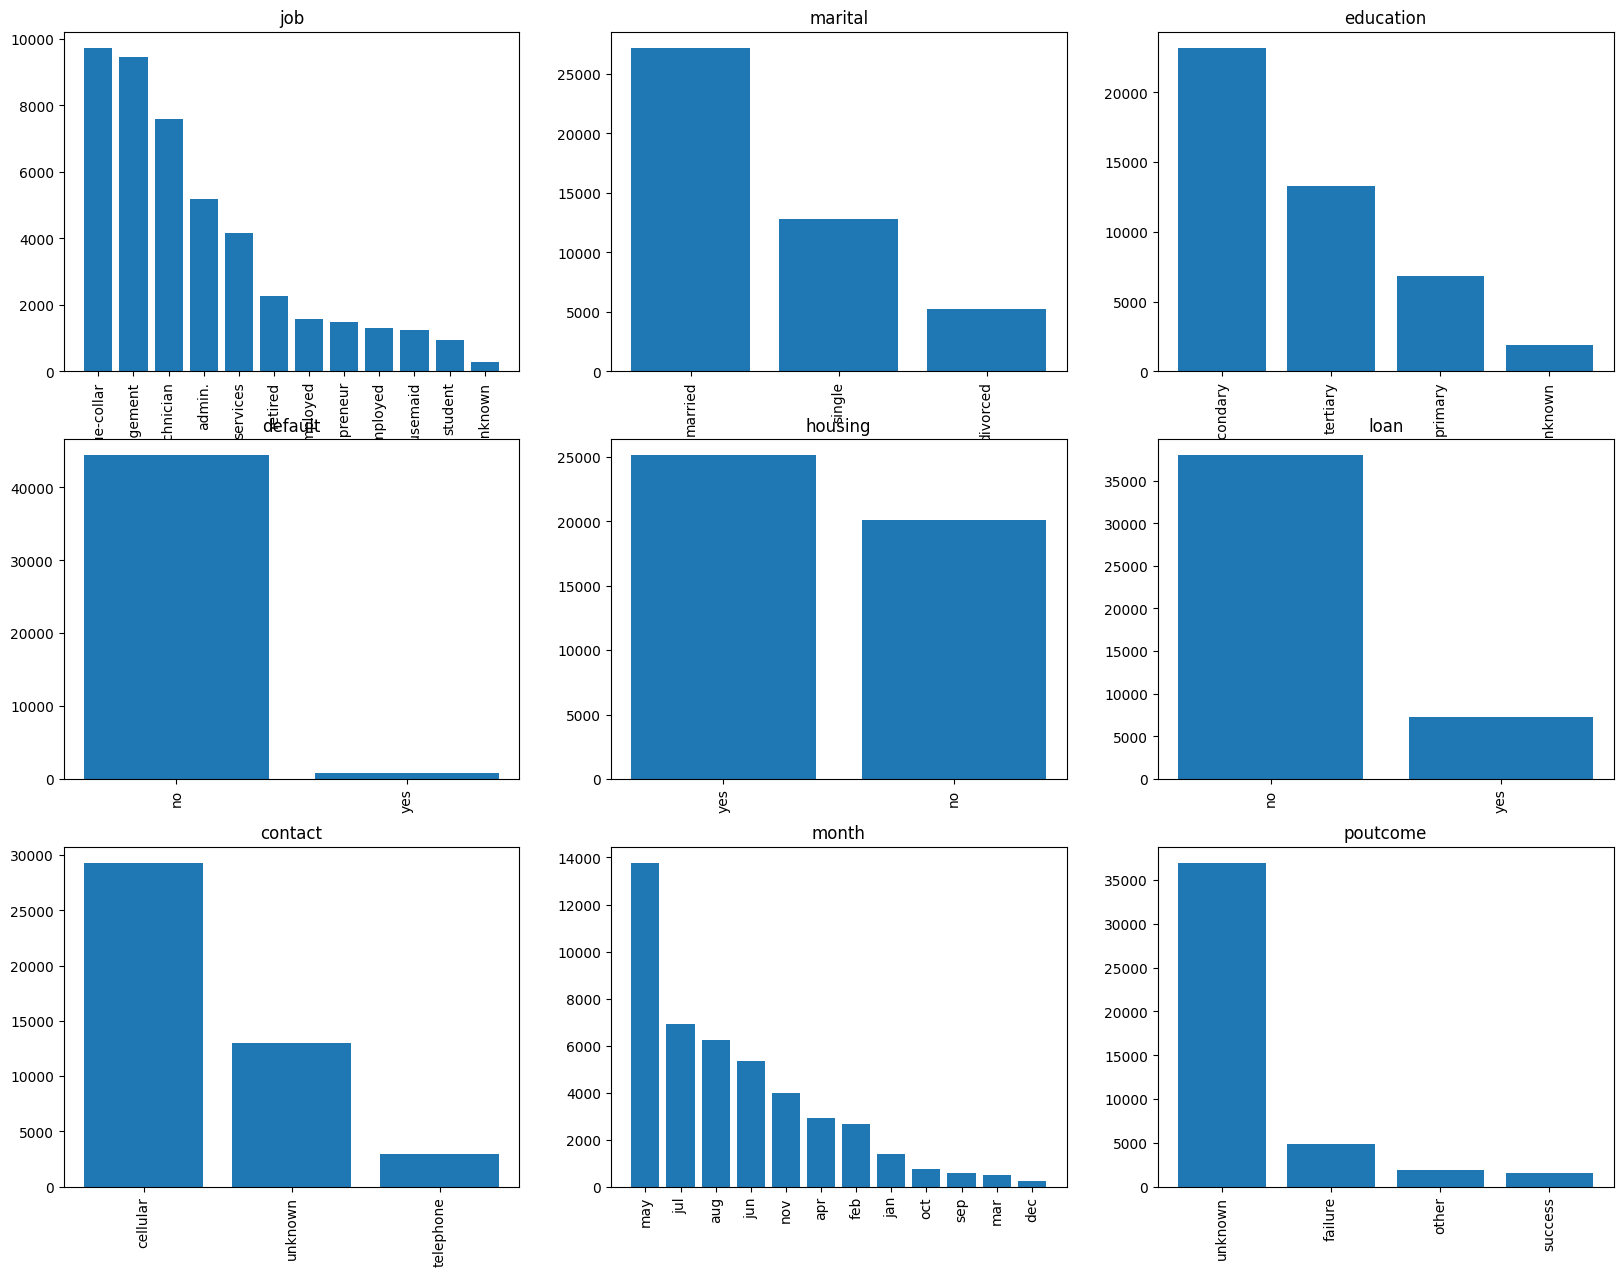

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

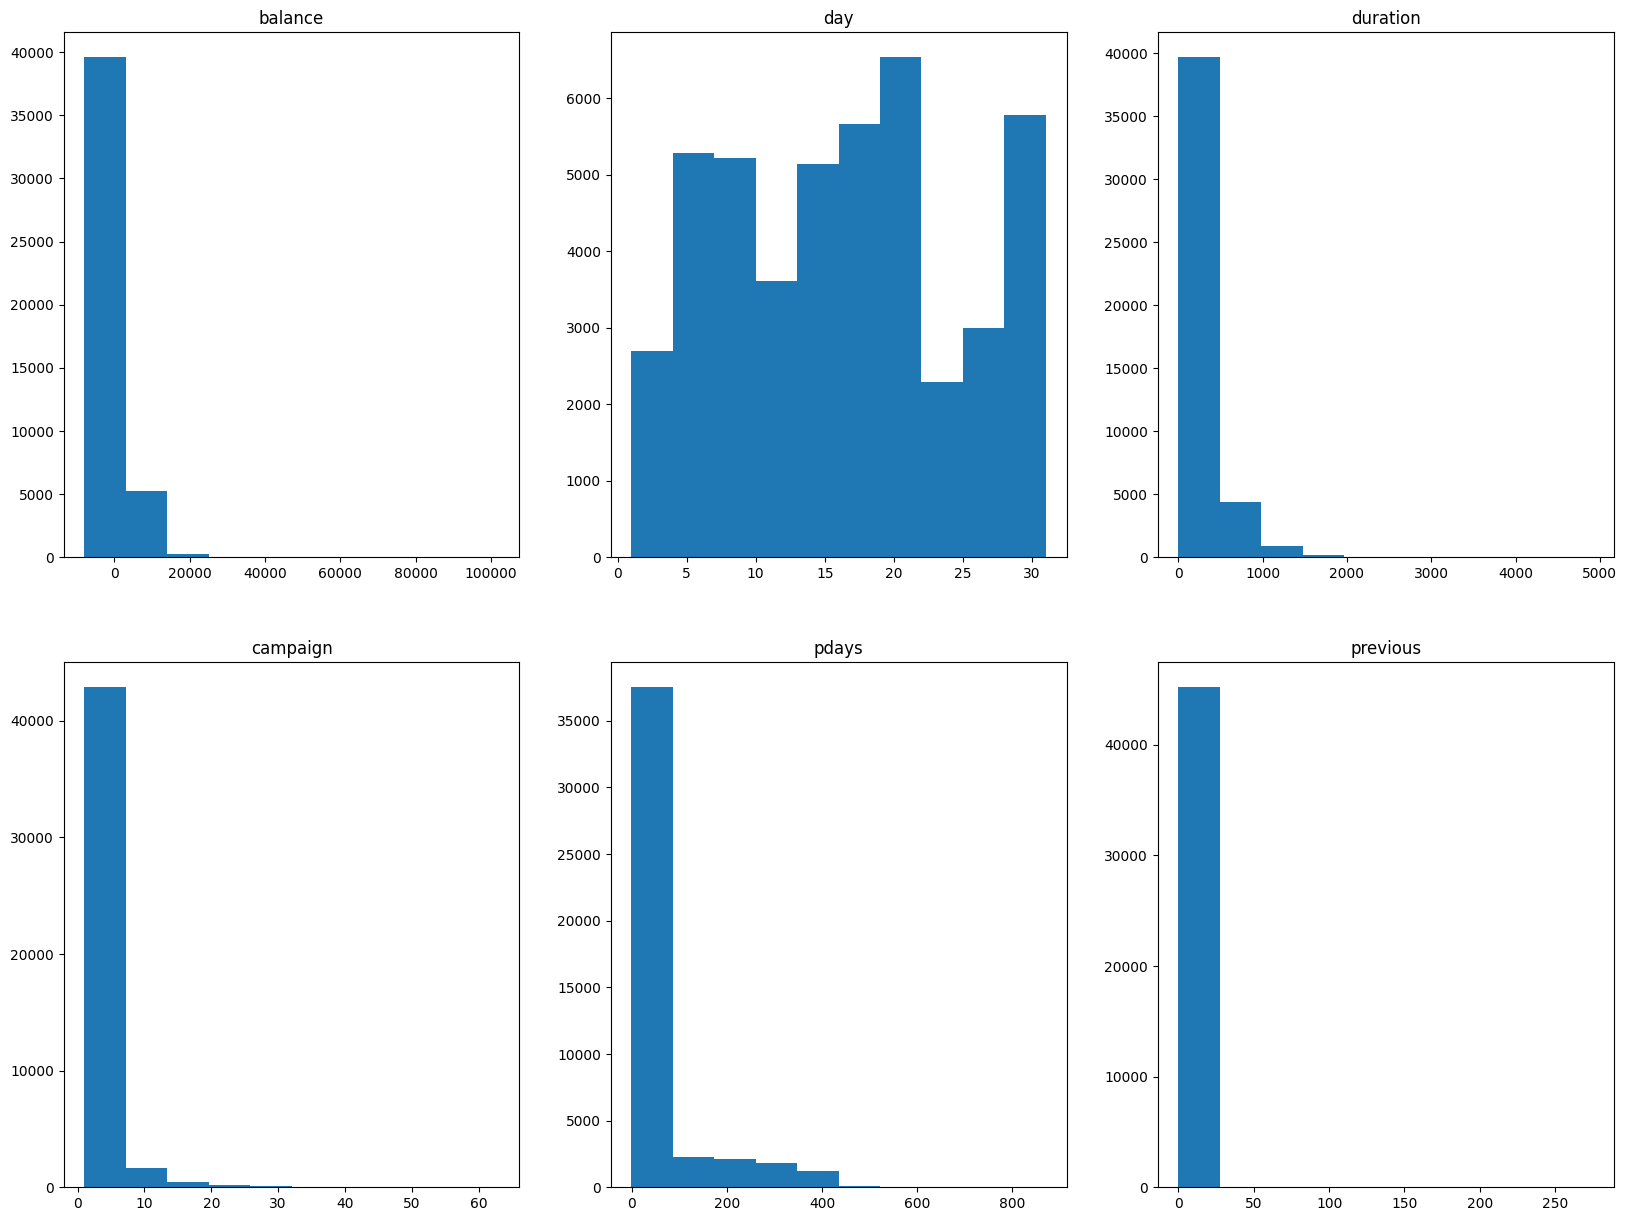

In [ ]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
df['Customer'].replace('yes', 1, inplace=True)
df['Customer'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
target = df['Customer']
df = df.drop('Customer',axis = 1)
columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=[columns])
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
y = np.array(target)
X = df

In [ ]:
data['Customer'].value_counts()

no     39922
yes     5289
Name: Customer, dtype: int64

<Axes: xlabel='Customer', ylabel='count'>

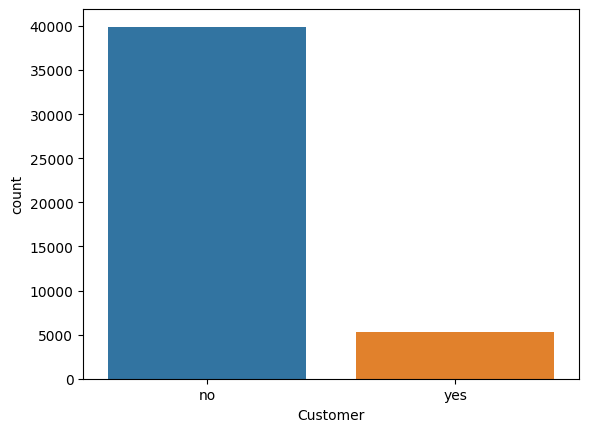

In [ ]:
sns.countplot(x='Customer',data=data)

In [ ]:

from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(X,y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 39922), (1, 39922)]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

Class=0, n=39922 (88.302%)
Class=1, n=39922 (88.302%)


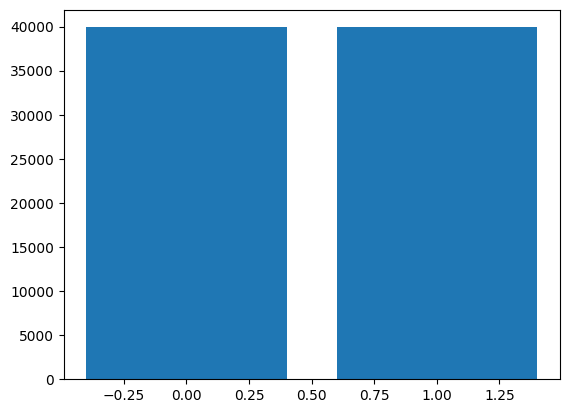

In [ ]:
counter = Counter(y_resampled)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
x_resampled.shape,y_resampled.shape

((79844, 42), (79844,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled,y_resampled,train_size=0.80, shuffle=True, random_state=45)

In [ ]:
X_train.shape, X_test.shape

((63875, 42), (15969, 42))

In [ ]:
y_test.shape

(15969,)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report

In [ ]:
models = [LogisticRegression(max_iter=1000,random_state=1), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(n_estimators=350),BernoulliNB(),DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)]

In [ ]:
def compare_models_train_test():

  for model in models:
    model.fit(X_train, y_train)
    
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)
    print(classification_report(test_data_prediction , y_test))
    cm=confusion_matrix(y_test,test_data_prediction)
    print(cm)

    f, ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()  

Accuracy score of the  LogisticRegression(max_iter=1000, random_state=1)  =  0.850272402780387
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      8027
           1       0.85      0.85      0.85      7942

    accuracy                           0.85     15969
   macro avg       0.85      0.85      0.85     15969
weighted avg       0.85      0.85      0.85     15969

[[6836 1200]
 [1191 6742]]


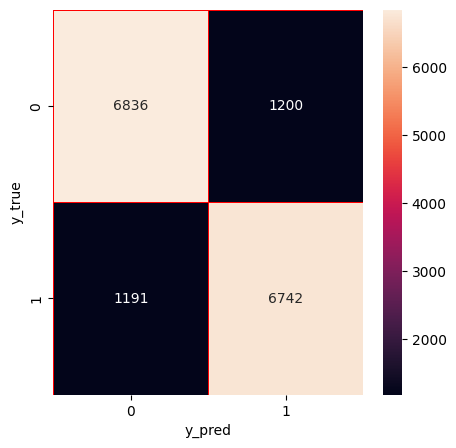

Accuracy score of the  SVC(kernel='linear')  =  0.8550316237710565
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      7715
           1       0.87      0.84      0.86      8254

    accuracy                           0.86     15969
   macro avg       0.86      0.86      0.86     15969
weighted avg       0.86      0.86      0.86     15969

[[6718 1318]
 [ 997 6936]]


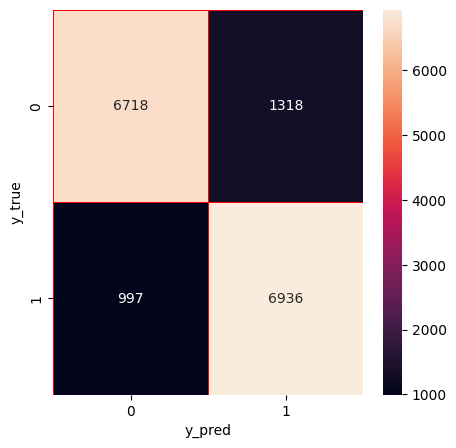

Accuracy score of the  KNeighborsClassifier()  =  0.8966121861105892
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7321
           1       0.94      0.86      0.90      8648

    accuracy                           0.90     15969
   macro avg       0.90      0.90      0.90     15969
weighted avg       0.90      0.90      0.90     15969

[[6853 1183]
 [ 468 7465]]


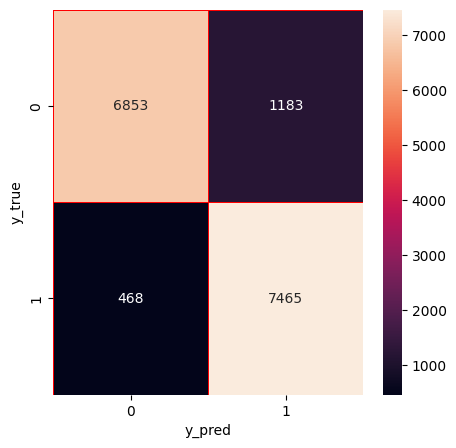

Accuracy score of the  RandomForestClassifier(n_estimators=350)  =  0.9450184732920033
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7692
           1       0.97      0.93      0.95      8277

    accuracy                           0.95     15969
   macro avg       0.95      0.95      0.95     15969
weighted avg       0.95      0.95      0.95     15969

[[7425  611]
 [ 267 7666]]


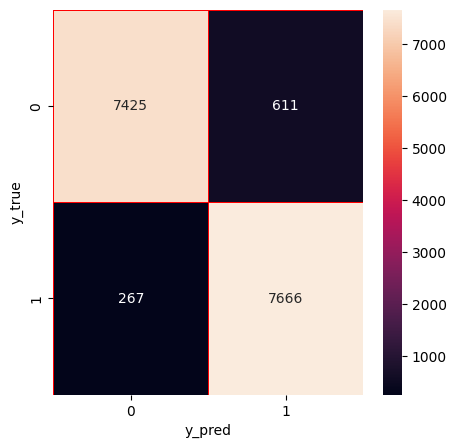

Accuracy score of the  BernoulliNB()  =  0.6663535600225436
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      9040
           1       0.60      0.69      0.64      6929

    accuracy                           0.67     15969
   macro avg       0.67      0.67      0.66     15969
weighted avg       0.67      0.67      0.67     15969

[[5874 2162]
 [3166 4767]]


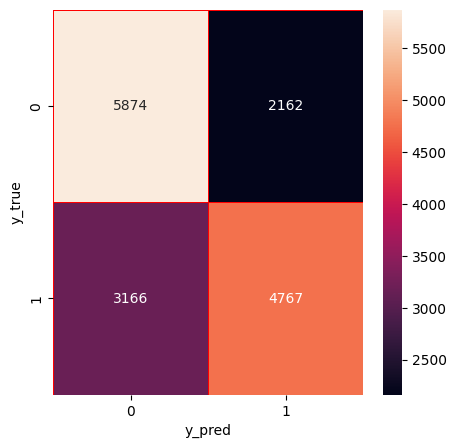

Accuracy score of the  DecisionTreeClassifier(max_depth=3, random_state=0)  =  0.8029306781889912
              precision    recall  f1-score   support

           0       0.70      0.88      0.78      6411
           1       0.90      0.75      0.82      9558

    accuracy                           0.80     15969
   macro avg       0.80      0.82      0.80     15969
weighted avg       0.82      0.80      0.80     15969

[[5650 2386]
 [ 761 7172]]


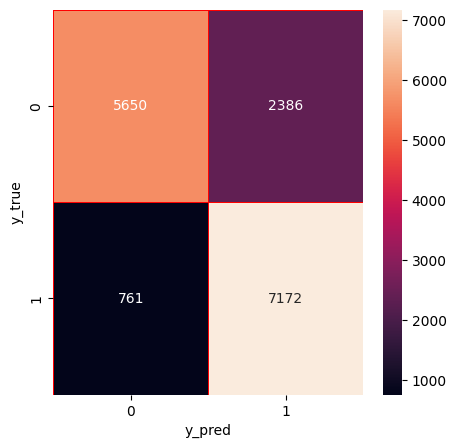

In [ ]:
compare_models_train_test()